<a href="https://colab.research.google.com/github/ersilia-os/event-fund-ai-drug-discovery/blob/main/notebooks/session2_breakout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ersilia Model Hub
The Ersilia Model Hub is a repository of pre-trained, ready-to-use AI models for drug discovery. A list of models and its applications is available [here](https://ersilia.io/model-hub).

You can run the Ersilia Model Hub in your computer by installing the [Ersilia Python Package](https://github.com/ersilia-os/ersilia). In this session, we will use the Google Colab implementation of the Ersilia Model Hub to ensure compatibility with all systems. 


In [10]:
# Installation on Google Colaboratory
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH={PYTHONPATH}:/usr/local/lib/python3.7/site-packages
%env CONDA_PREFIX=/usr/local
%env CONDA_PREFIX_1=/usr/local
%env CONDA_DEFAULT_ENV=base
!pip install git+https://github.com/ersilia-os/ersilia.git
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX
!python -m pip install flask
!python -m pip install urllib<=1.25
!python -m pip install chardet<=5.0
import sys
_ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))

In [13]:
!python -m pip install urllib==1.26.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement urllib==1.26.5 (from versions: none)
ERROR: No matching distribution found for urllib==1.26.5


In [12]:
!pip3 list|grep urllib

urllib3                   1.25.11


## Breakout activity

We will use the Ersilia Model Hub to filter a list of 400 compounds (the MMV Pathogen Box) to try and identify the best ones for experimental testing.

First, let's mount again our Drive for retrieving the data and storing the files we will need during the session.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#do not run this if you already did during Session 1

!mkdir /content/drive/MyDrive/DataScience_Workshop
!git clone https://github.com/ersilia-os/event-fund-ai-drug-discovery.git /content/drive/MyDrive/DataScience_Workshop

Cloning into '/content/drive/MyDrive/DataScience_Workshop'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 110 (delta 45), reused 69 (delta 23), pack-reused 0
Receiving objects: 100% (110/110), 1.65 MiB | 7.27 MiB/s, done.
Resolving deltas: 100% (45/45), done.


## Example Model Prediction
We will use one model as a step-by-step guide of how to use the Ersilia Model Hub and analyse the results.

Each Ersilia model is identified by a code (eosxxxx) and a slug (one - two word identifier). We will always refer to the models by either the code or the slug. There are three basic commands to run a model with Ersilia:
1.   Fetch: retrieves a model from its online storage
2.   Serve: brings the model alive, ready to be used
3.   Predict: makes predictions for any input molecules of interest

More details are available in the Ersilia Model Hub [documentation](https://ersilia.gitbook.io/ersilia-book/).

### Antimalarial Activity
The Ersilia Model Hub contains a surrogate version of MAIP, a web-based model for predicting blood-stage malaria inhibitors, published in [Bosc et al, 2021](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-021-00487-2)

In [11]:
!ersilia -v fetch eos2gth

/usr/local/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.25.11) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
⬇️  Fetching model eos2gth: maip-malaria-surrogate
14:09:25 | INFO     | Starting delete of model eos2gth
14:09:25 | INFO     | Removing folder /root/eos/dest/eos2gth
/usr/local/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.25.11) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
14:09:28 | INFO     | Deleting conda environment eos2gth
/usr/local/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.25.11) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
14:09:29 | DEBUG    | Deleting /root/eos/isaura/lake/eos2gth_local.h5
14:09:29 | DEBUG    | Deleting /root/eos/isaur

In [7]:
!ersilia serve eos2gth

🚀 Serving model eos2gth: maip-malaria-surrogate

   URL: http://127.0.0.1:33797
   PID: 4460
   SRV: conda

👉 Available APIs:
   - predict


In [16]:
!ersilia api predict -i "drive/MyDrive/DataScience_Workshop/data/day2/mmv_malariabox.csv" -o "drive/MyDrive/DataScience_Workshop/data/day2/eos2gth.csv"

drive/MyDrive/DataScience_Workshop/data/day2/eos2gth.csv


### Analysing the predictions
We can use the Pandas Package to work with .CSV files and Matplotlib to plot the results of the models. We can also go directly to GoogleDrive and work with the excel files.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("drive/MyDrive/DataScience_Workshop/data/day2/eos2gth.csv")

In [18]:
df.head()

,key,input,score
0,ALGPHOUNWIZIOQ-UHFFFAOYSA-N,COc1ccccc1CNC(=O)CCn1c(=O)[nH]c2ccsc2c1=O,6.886159
1,QFVDKARCPMTZCS-UHFFFAOYSA-N,CN(C)c1ccc(C(O)(c2ccc(N(C)C)cc2)c2ccc(N(C)C)cc...,15.483177
2,HKNNPGWJKJDXCN-UHFFFAOYSA-N,Cc1ccc(-c2cc3c(SCC(=O)Nc4cc(C(F)(F)F)ccc4Cl)nc...,27.288106
3,QQNUVMRXVVLAAU-UHFFFAOYSA-N,CCOC(=O)C1=C(c2ccccc2)N=c2sc(=Cc3cc(C)n(-c4ccc...,12.532308
4,MSGARPVVCYTSLR-UHFFFAOYSA-N,CCOC(=O)c1cnc2c(C)cc(C)cc2c1Nc1ccc(OC)c(OC)c1,37.554438


In [19]:
df.sort_values("score", ascending=False)

,key,input,score
136,HPFVQAYLQOSFOL-UHFFFAOYSA-N,COc1cccc(Nc2nc(NCCO)c3ccccc3n2)c1,77.199021
399,ZGMMVVYGDFQTBB-UHFFFAOYSA-N,OCCNc1nc(Nc2ccc(Cl)c(Cl)c2)nc2ccccc12,76.798370
69,RHZLKBRFIAZMTN-UHFFFAOYSA-N,Cc1ccc(Nc2nc(NCCO)c3ccccc3n2)cc1C,76.052494
339,NPWXHTXMBIOHKI-UHFFFAOYSA-N,Cn1c(=O)n(C)c2cc(CNCCNc3ccnc4cc(Cl)ccc34)ccc21,76.012591
55,YZZGEZJZTYYZGG-UHFFFAOYSA-N,CCN(CC)CCNc1ncnc2c1[nH]c1ccc(Cl)cc12,71.951154
...,...,...,...
285,HURFFFRCSHQNDT-UHFFFAOYSA-N,CCOC(=O)C1=C(C)N=c2sc(=Cc3ccccc3O)c(=O)n2C1c1c...,-0.457356
337,GIIJJSVNYMYHHB-UHFFFAOYSA-N,COc1ccc(C=C2SC(Nc3ccccc3)=NC2=O)cc1,-0.646291
37,YBPABXGFEMOUTB-UHFFFAOYSA-N,COc1ccc(C=C2SC(=N)N(c3ccccc3OC)C2=O)cc1,-4.133714
64,ZMRHGYILDNXKHW-UHFFFAOYSA-N,CCCCCCOC(=O)C1=C(C)NC(=O)NC1c1ccccc1F,-5.453928


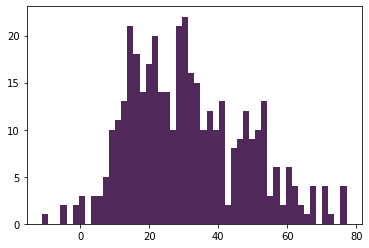

In [23]:
plt.hist(df["score"], bins=50, color="#50285a")
plt.show()

Here is a list of models that can be used for this exercise. Please refer to the [Ersilia Model Hub](https://www.ersilia.io/model-hub) to read more about each one of them, the source of data they use and how can them be applied to our problem.

*   Malaria Activity: eos2gth / maip-malaria-surrogate
*   Tuberculosis Activity: eos46ev / chemtb
*   Antibiotic Activity: eos4e40 / chemprop-antibiotic
*   Cardiotoxicity (hERG): eos2ta5 / cardiotox-net
*   Natural Product Likeness: eos9yui / natural-product-likeness
*   Retrosynthetic Accessibility: eos2r5a / retrosynthetic-accessibility
*   Aqueous Solubility: eos6oli / soltrannet-aqueous-solubility

In [2]:
!ersilia -v fetch eos46ev
!ersilia serve eos46ev
!ersilia api predict -i "drive/MyDrive/DataScience_Workshop/data/day2/mmv_malariabox.csv" -o "drive/MyDrive/DataScience_Workshop/data/day2/eos46ev.csv"

Traceback (most recent call last):
  File "/usr/local/bin/ersilia", line 8, in <module>
    sys.exit(cli())
  File "/usr/local/lib/python3.7/site-packages/click/core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/click/core.py", line 1055, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.7/site-packages/click/core.py", line 1657, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.7/site-packages/click/core.py", line 1404, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.7/site-packages/click/core.py", line 760, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/bentoml/cli/click_utils.py", line 138, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/bentoml/cli/click_utils.py", line 115, in wrapper
    return_value = func(*args, *

In [4]:
!ersilia fetch eos4e40
!ersilia serve eos4e40
!ersilia api predict -i "drive/MyDrive/DataScience_Workshop/data/day2/mmv_malariabox.csv" -o "drive/MyDrive/DataScience_Workshop/data/day2/eos4e40.csv"

⬇️  Fetching model eos4e40: chemprop-antibiotic
👍 Model eos4e40 fetched successfully!
🚀 Serving model eos4e40: chemprop-antibiotic

   URL: http://127.0.0.1:59317
   PID: 6445
   SRV: conda

👉 Available APIs:
   - predict
drive/MyDrive/DataScience_Workshop/data/day2/eos4e40.csv


In [ ]:
!ersilia -v fetch eos2ta5
!ersilia serve eos2ta5
!ersilia api predict -i "drive/MyDrive/DataScience_Workshop/data/day2/mmv_malariabox.csv" -o "drive/MyDrive/DataScience_Workshop/data/day2/eos2ta5.csv"

In [ ]:
!ersilia -v fetch eos9yui
!ersilia serve eos9yui
!ersilia api predict -i "drive/MyDrive/DataScience_Workshop/data/day2/mmv_malariabox.csv" -o "drive/MyDrive/DataScience_Workshop/data/day2/eos9yui.csv"

In [4]:
!ersilia fetch eos2r5a
!ersilia serve eos2r5a
!ersilia api predict -i "drive/MyDrive/DataScience_Workshop/data/day2/mmv_malariabox.csv" -o "drive/MyDrive/DataScience_Workshop/data/day2/eos2r5a.csv"

/usr/local/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.25.11) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Traceback (most recent call last):
  File "/usr/local/bin/ersilia", line 5, in <module>
    from ersilia.cli import cli
  File "/usr/local/lib/python3.7/site-packages/ersilia/cli/__init__.py", line 1, in <module>
    from .create_cli import create_ersilia_cli
  File "/usr/local/lib/python3.7/site-packages/ersilia/cli/create_cli.py", line 3, in <module>
    from .commands import ersilia_cli
  File "/usr/local/lib/python3.7/site-packages/ersilia/cli/commands/__init__.py", line 2, in <module>
    from bentoml.cli.click_utils import BentoMLCommandGroup
  File "/usr/local/lib/python3.7/site-packages/bentoml/cli/__init__.py", line 19, in <module>
    from bentoml.cli.bento_management import add_bento_sub_command
  File "/usr/local/lib/python3.7/site-packages/bentoml/cli/bento

In [ ]:
!ersilia fetch eos6oli
!ersilia serve eos6oli
!ersilia api predict -i "drive/MyDrive/DataScience_Workshop/data/day2/mmv_malariabox.csv" -o "drive/MyDrive/DataScience_Workshop/data/day2/eos6oli.csv"